# Q.2  Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [3]:
data=pd.read_csv("crime_data.csv")

In [4]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
data.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
data.shape

(50, 5)

# Data Exploration

In [8]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

# Eploratory Data Analysis

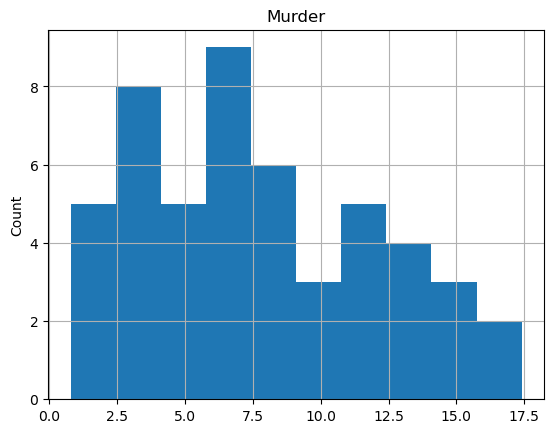

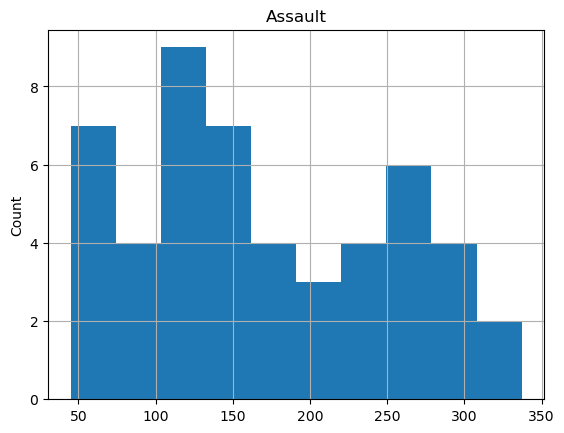

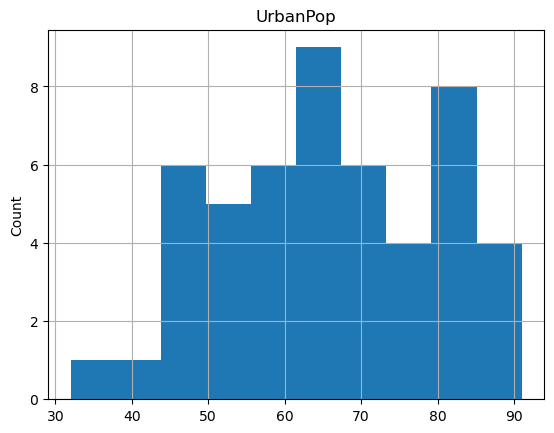

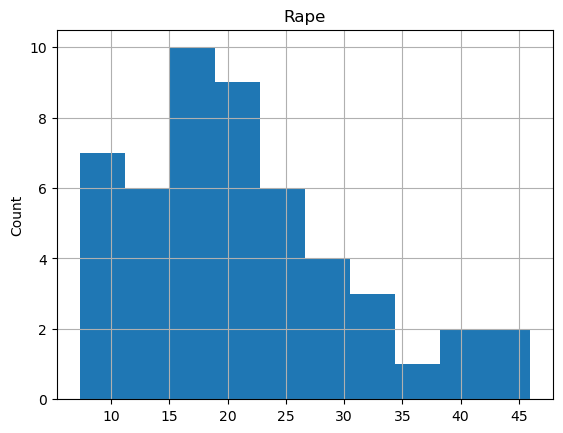

In [11]:
continuous_feature = [feature for feature in data.columns if data[feature].dtype!='O']
for feature in continuous_feature:
    data1 = data.copy()
    data1[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [12]:
data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

<Axes: >

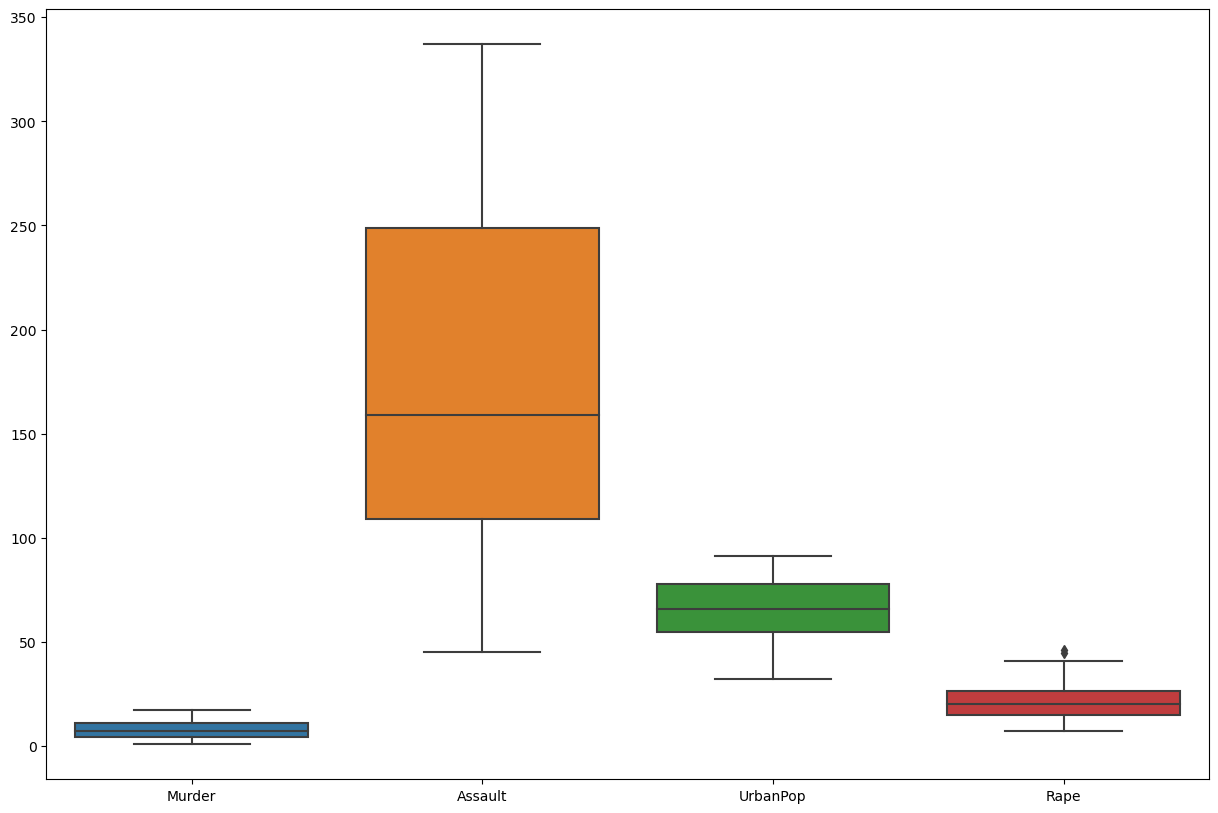

In [14]:
# Box plot for every feature in the same graph

plt.figure(figsize=(15,10))
sns.boxplot(data=data)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


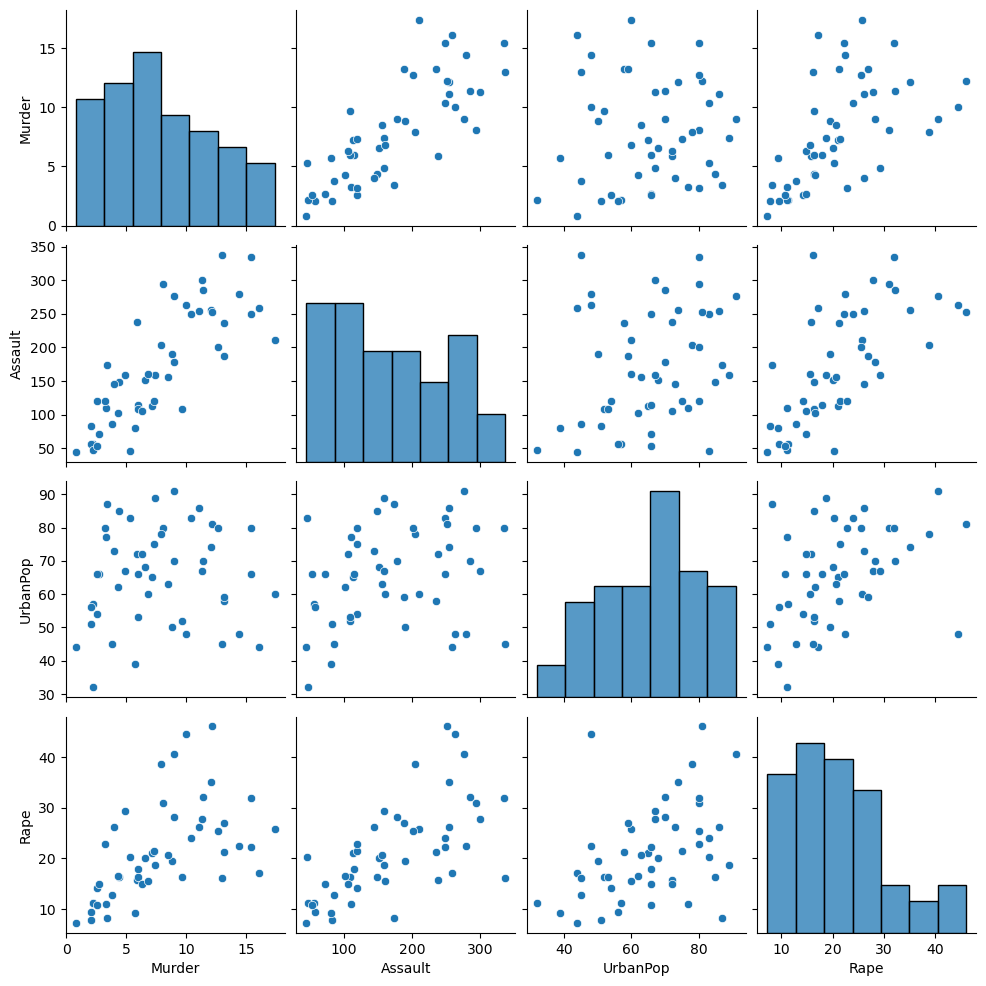

In [18]:
sns.pairplot(data)
plt.show()

# Data Visualization

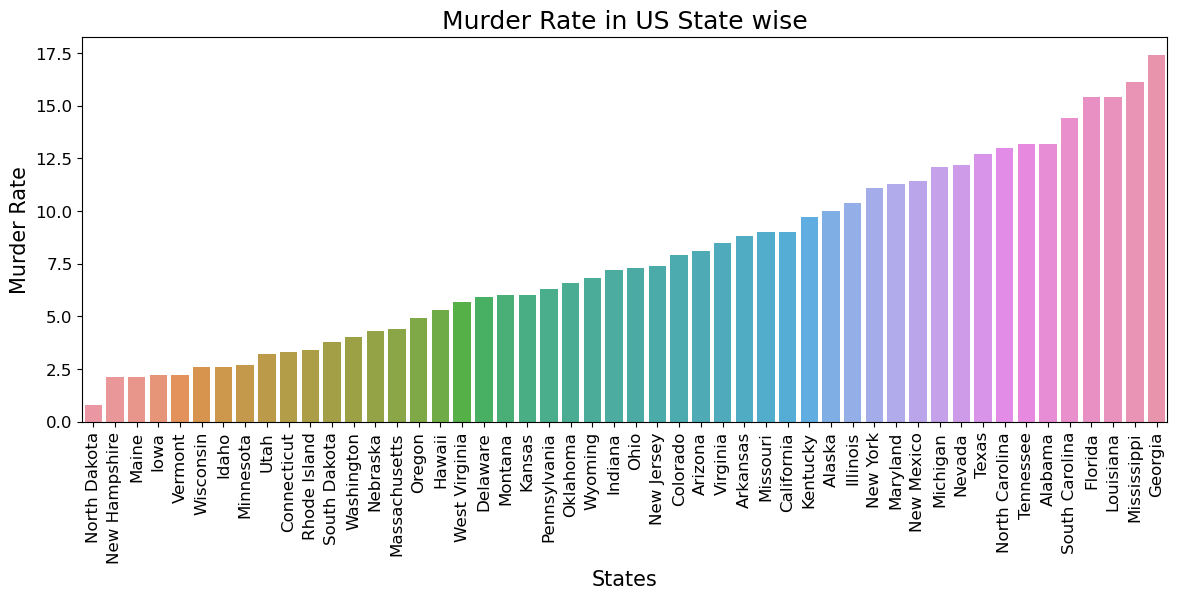

In [21]:
#Murder Rate
plt.figure(figsize=(14,5))
# make barplot and sort bars
sns.barplot(x='States', y="Murder", data=data, order=data.sort_values('Murder').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

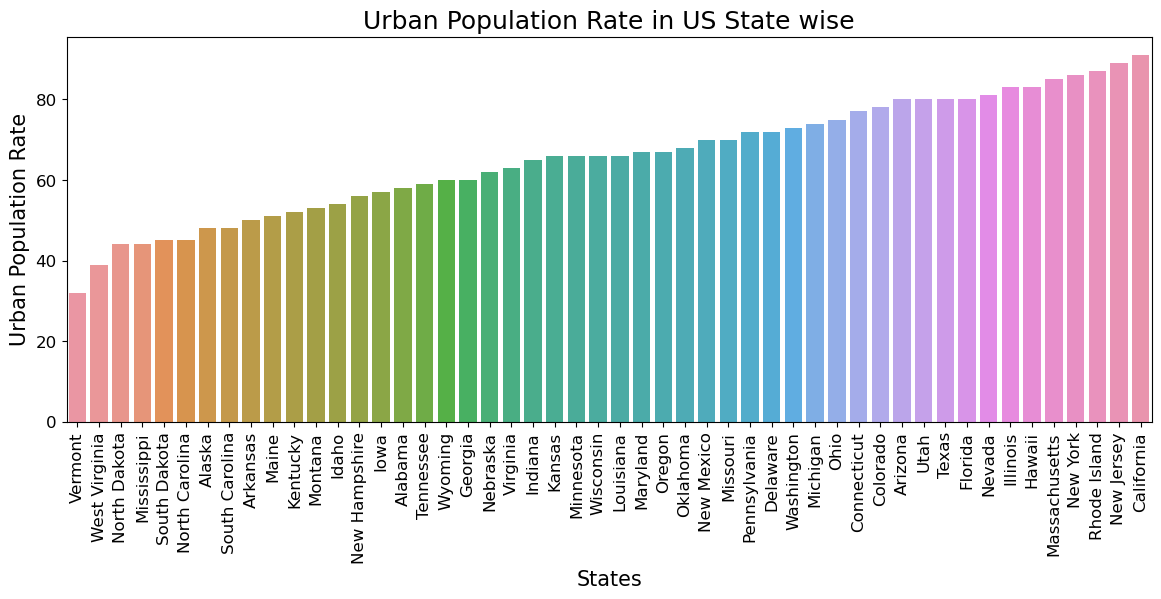

In [22]:
plt.figure(figsize=(14,5))
# make barplot and sort bars
sns.barplot(x='States', y="UrbanPop", data=data, order=data.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

# Observation:
There is no direct relation between Murder Rate and Urban Population but you can see a less number of Murder rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect

In [23]:
high_murder = data.sort_values('Murder', ascending = False, ignore_index=True)
high_murder.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5
5,Alabama,13.2,236,58,21.2
6,Tennessee,13.2,188,59,26.9
7,North Carolina,13.0,337,45,16.1
8,Texas,12.7,201,80,25.5
9,Nevada,12.2,252,81,46.0


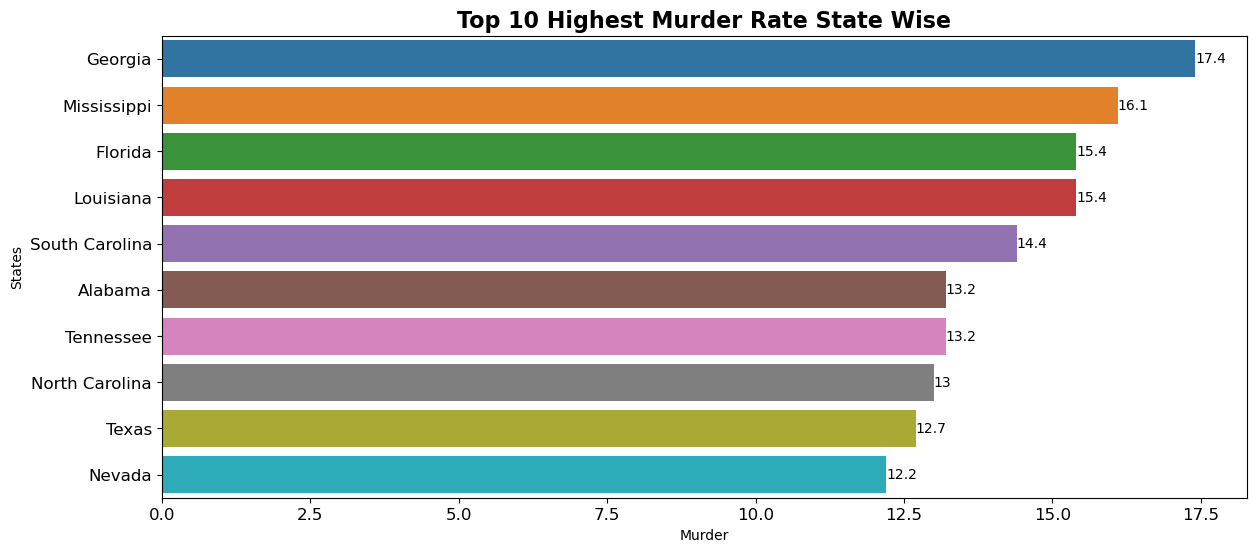

In [24]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_murder.Murder[:10], y = high_murder.States[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

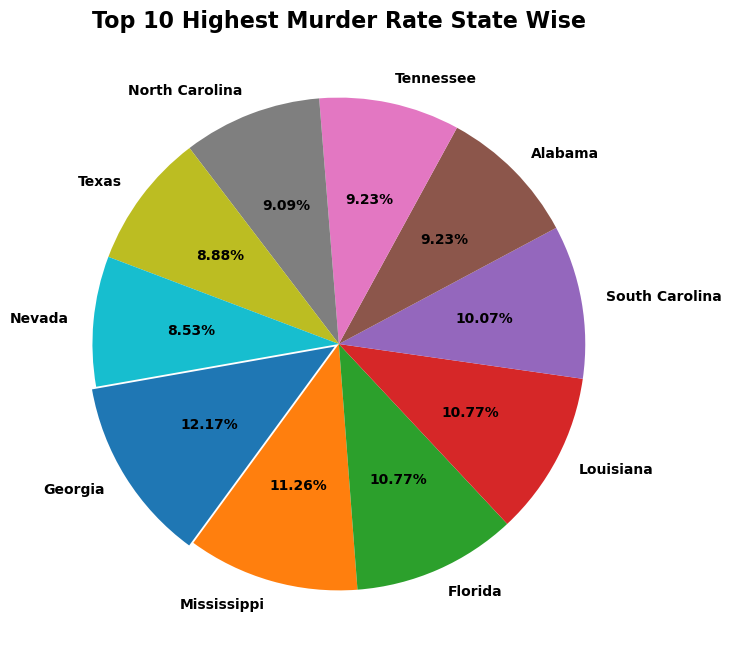

In [25]:
plt.figure(figsize = (8,8))
plt.pie(high_murder.Murder[:10], labels= high_murder.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [26]:
low_murder = data.sort_values('Murder', ascending = True, ignore_index=True)
low_murder.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2
5,Wisconsin,2.6,53,66,10.8
6,Idaho,2.6,120,54,14.2
7,Minnesota,2.7,72,66,14.9
8,Utah,3.2,120,80,22.9
9,Connecticut,3.3,110,77,11.1


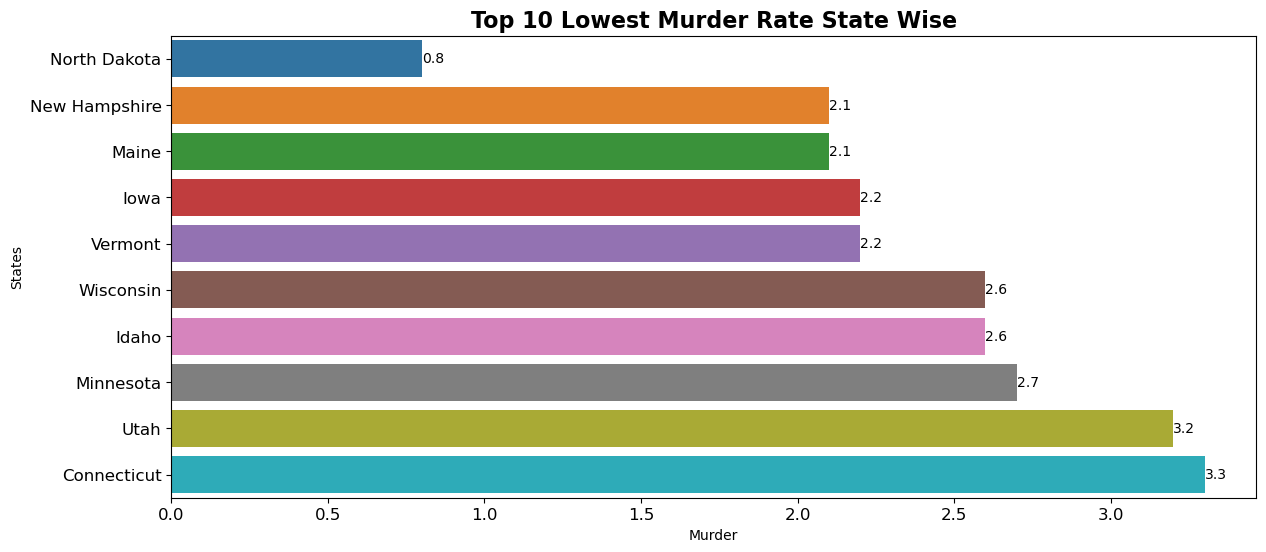

In [27]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_murder.Murder[:10], y = low_murder.States[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

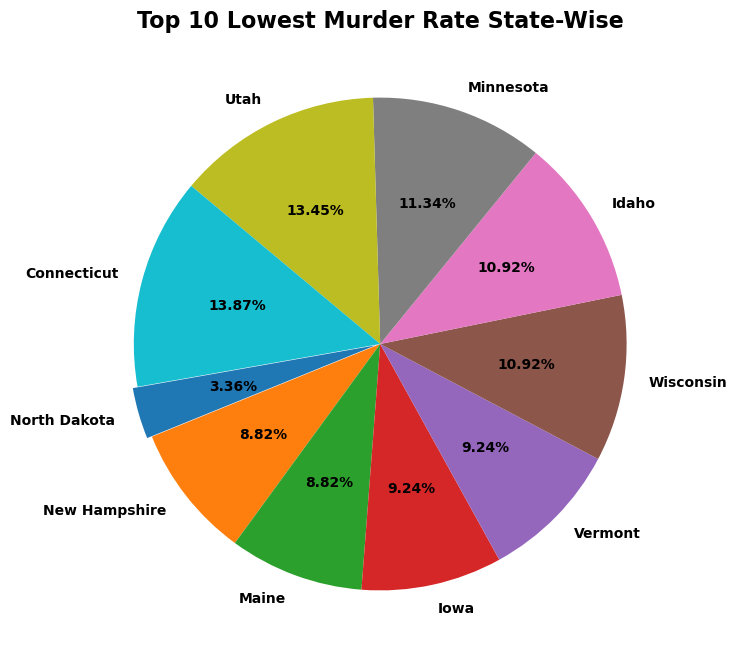

In [28]:
plt.figure(figsize = (8,8))
plt.pie(low_murder.Murder[:10], labels= low_murder.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold',})

plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 16, fontweight = 'bold')
plt.show()

# Observations:
Highest Murder Rate : Georgia, Missisippi and Florida

Lowest Murder Rate : North Dakota, New Hampshire, Idaho, Iowa, Maine, Vermont and Wisconsin.

# Assault Rate

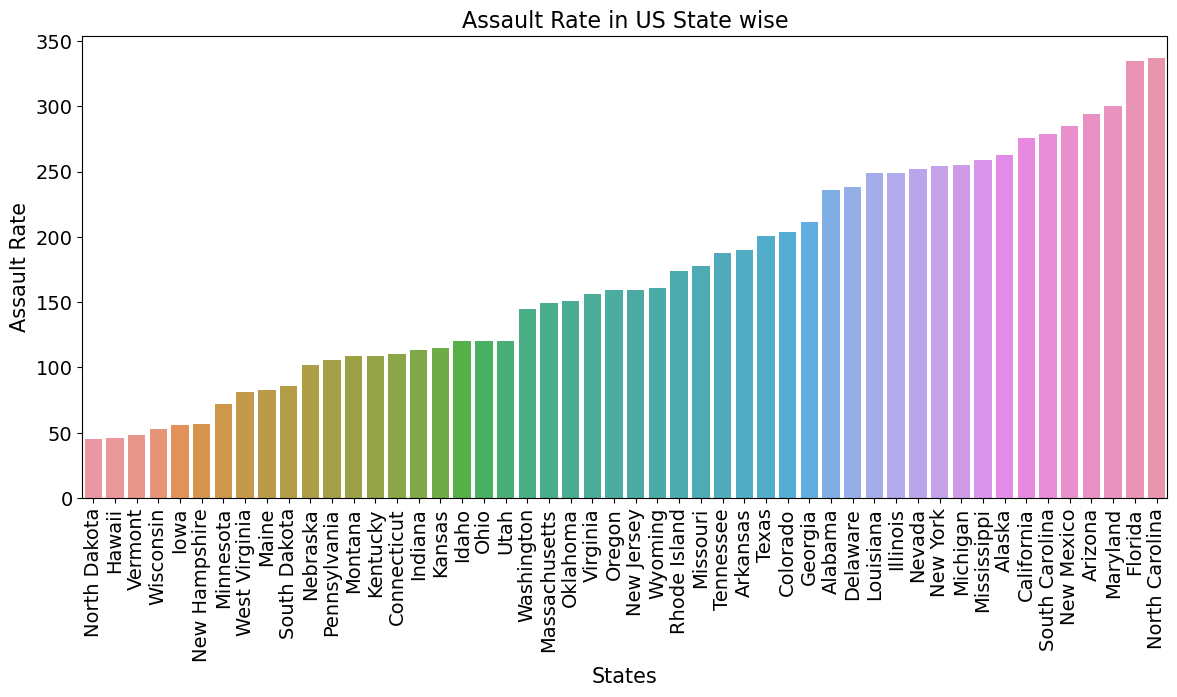

In [34]:
plt.figure(figsize=(14,6))

sns.barplot(x='States', y="Assault", data=data, order=data.sort_values('Assault').States)

plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Assault Rate in US State wise", size=16)
plt.show()

In [35]:
high_assault = data.sort_values('Assault', ascending = False, ignore_index=True)
high_assault.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


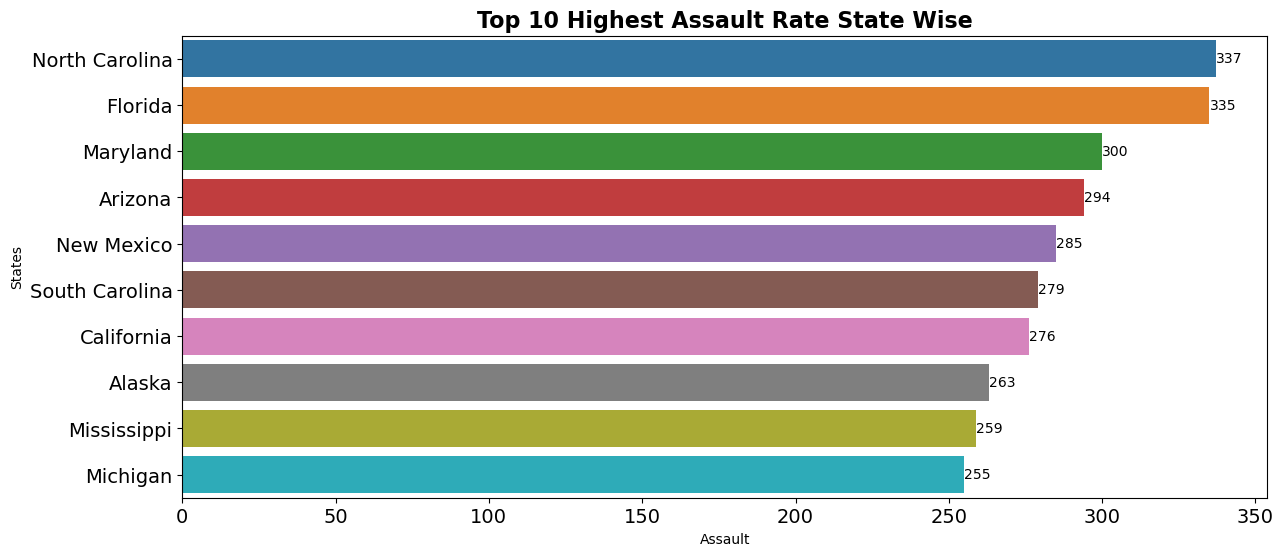

In [36]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_assault.Assault[:10], y = high_assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

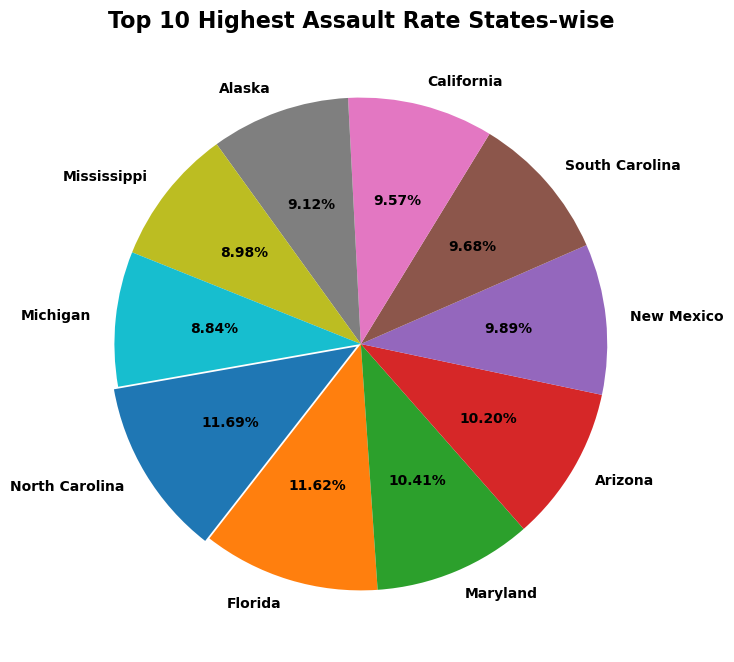

In [37]:
plt.figure(figsize = (8,8))
plt.pie(high_assault.Assault[:10], labels=high_assault.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [38]:
low_assault = data.sort_values('Assault', ascending = True, ignore_index= True)
low_assault.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3
5,New Hampshire,2.1,57,56,9.5
6,Minnesota,2.7,72,66,14.9
7,West Virginia,5.7,81,39,9.3
8,Maine,2.1,83,51,7.8
9,South Dakota,3.8,86,45,12.8


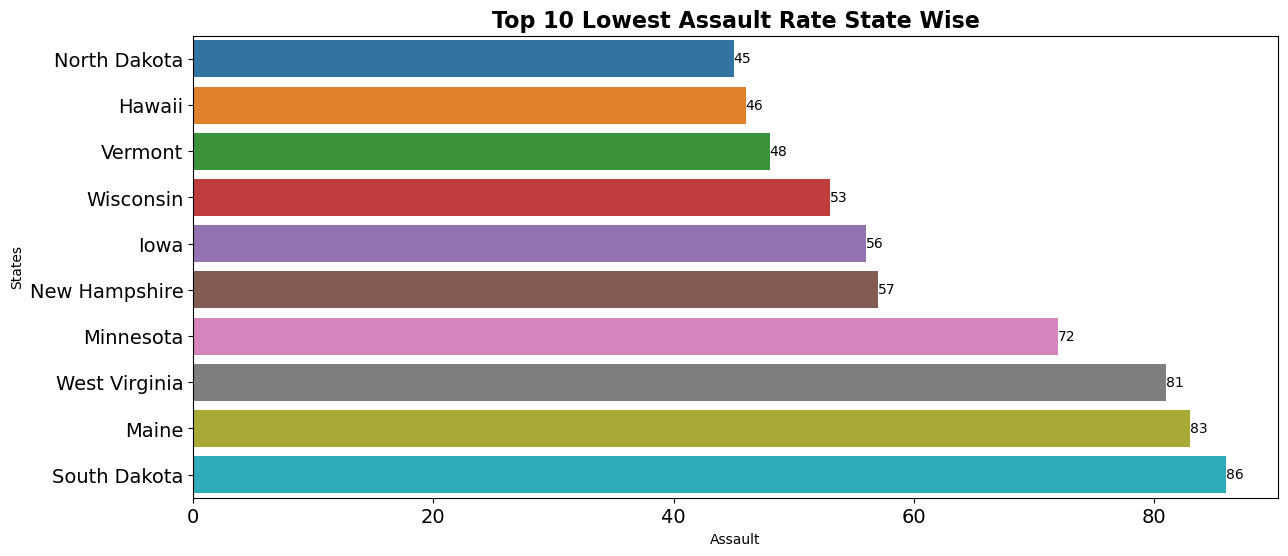

In [39]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_assault.Assault[:10], y = low_assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

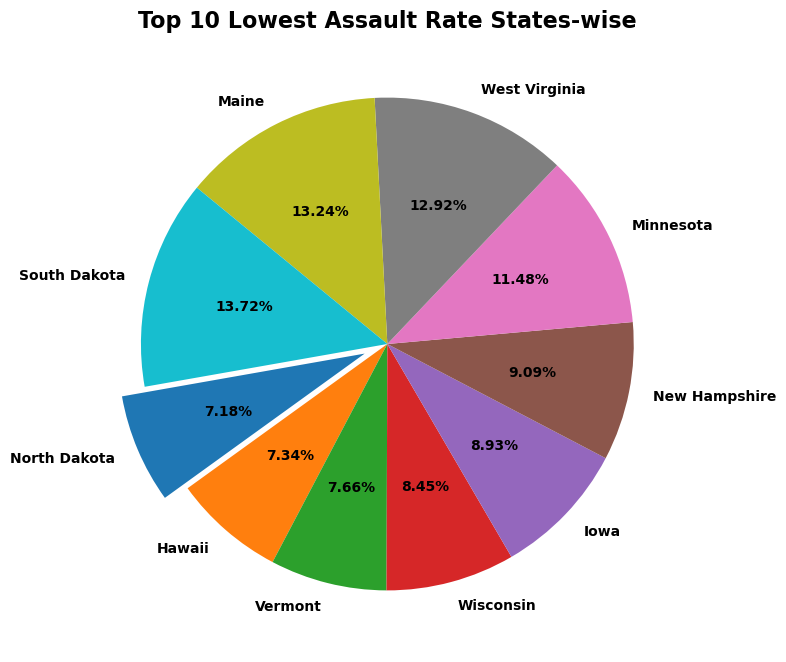

In [40]:
plt.figure(figsize = (8,8))
plt.pie(low_assault.Assault[:10], labels= low_assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()


# Observations:
Highest Assault Rate : North Carolina, Florida and Maryland

Lowest Assault Rate : North Dakota, Hawaii and Vermont.

# Rape Rate

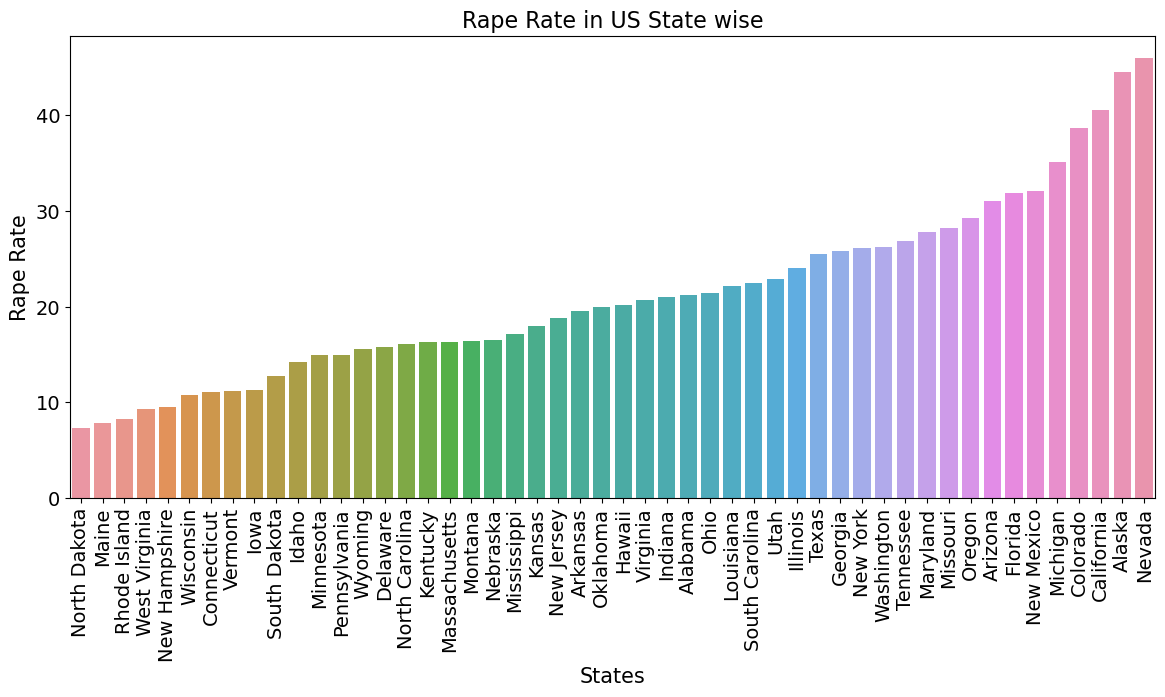

In [41]:
plt.figure(figsize=(14,6))

sns.barplot(x='States', y="Rape", data=data, order=data.sort_values('Rape').States)


plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Rape Rate in US State wise", size=16)
plt.show()

In [42]:
high_rape = data.sort_values('Rape', ascending=False, ignore_index=True)
high_rape.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


In [43]:
low_rape=data.sort_values('Rape',ascending=True,ignore_index=True)
low_rape.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5


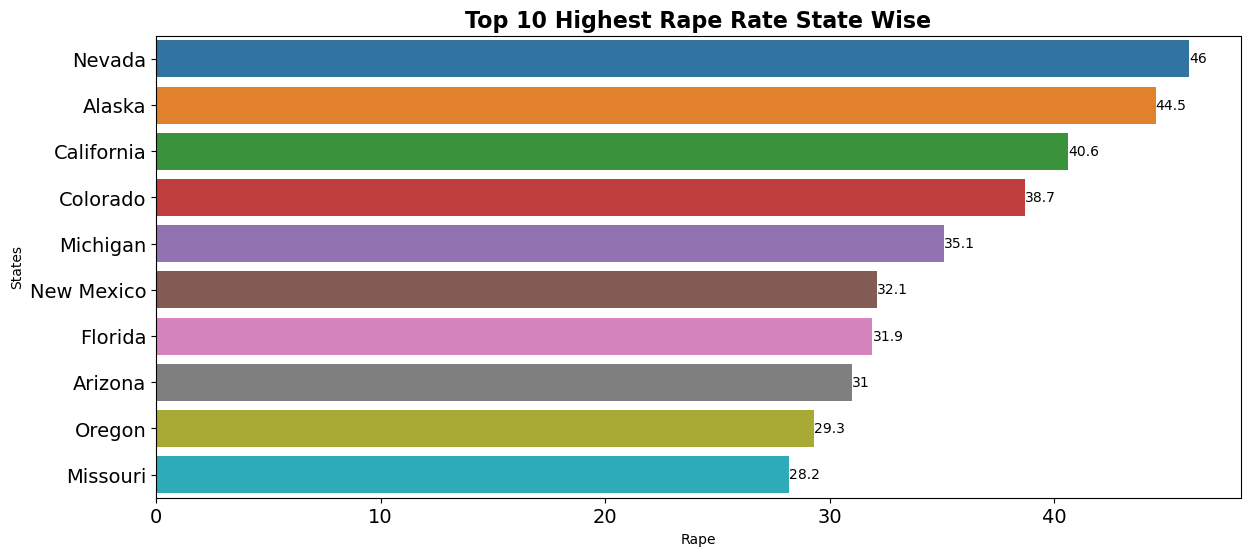

In [44]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_rape.Rape[:10], y =high_rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

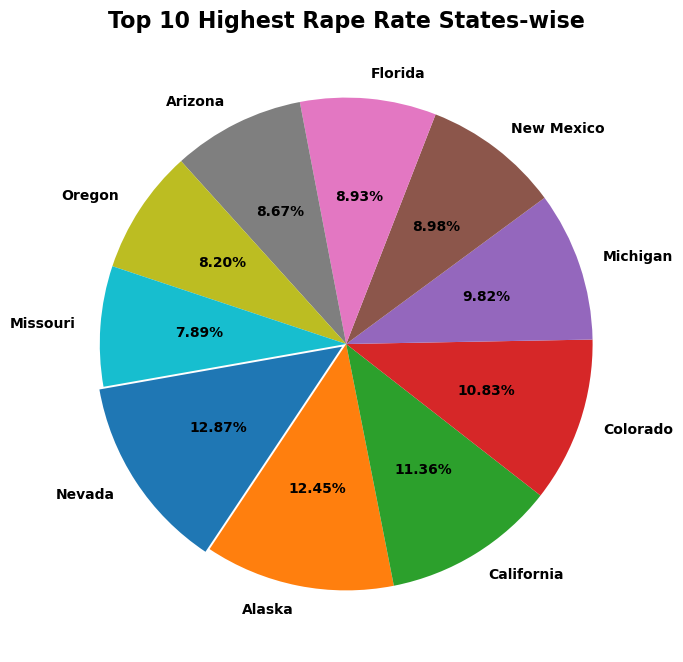

In [45]:
plt.figure(figsize = (8,8))
plt.pie(high_rape.Rape[:10], labels= high_rape.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium',
                   'fontweight':'bold'})

plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

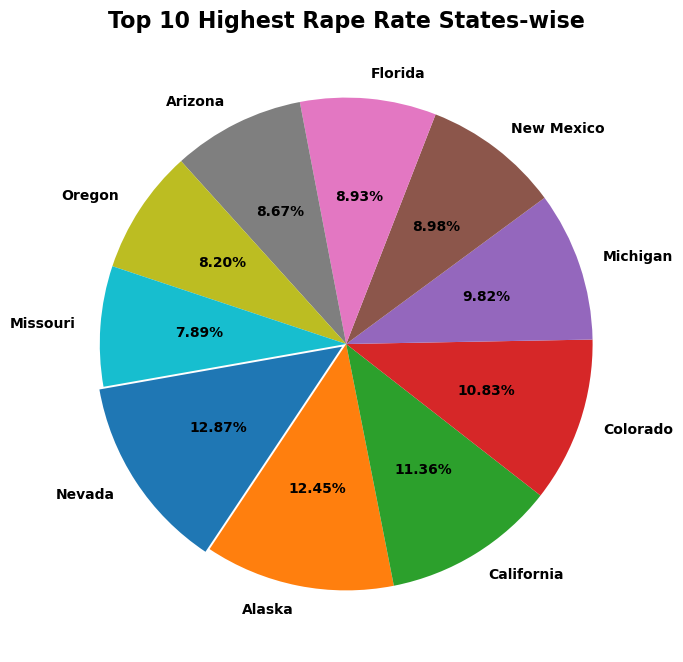

In [46]:
plt.figure(figsize = (8,8))
plt.pie(high_rape.Rape[:10], labels= high_rape.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium',
                   'fontweight':'bold'})

plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

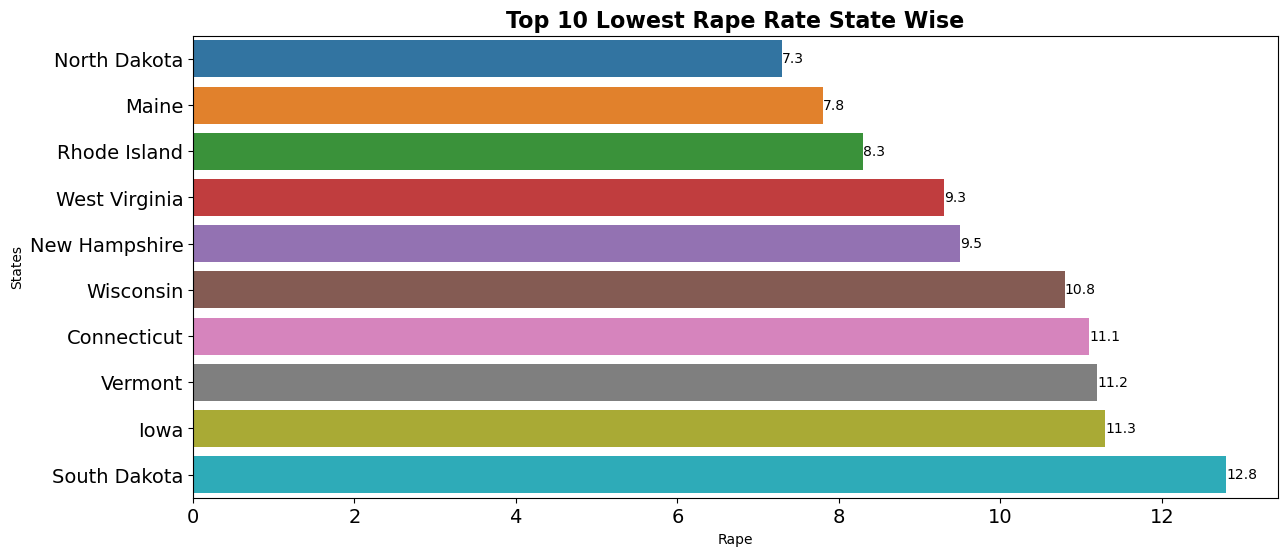

In [47]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x=low_rape.Rape[:10],y=low_rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

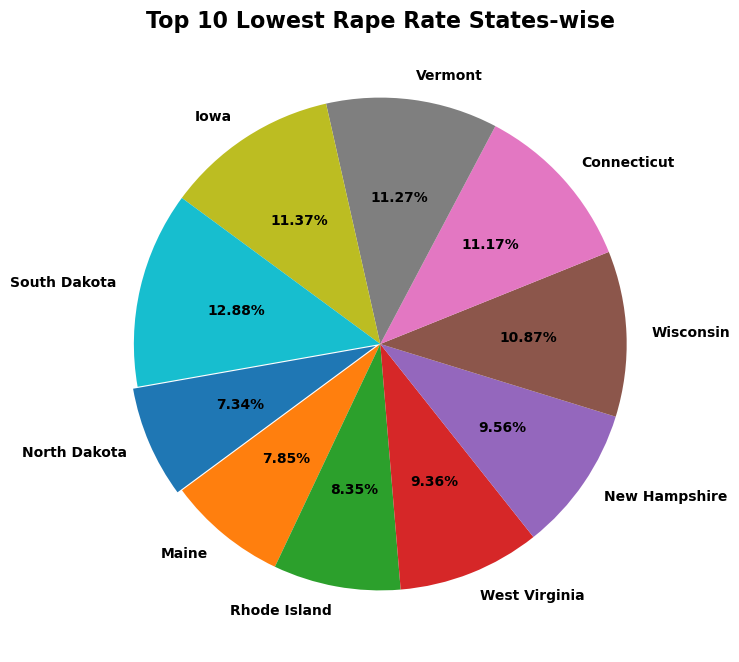

In [48]:
plt.figure(figsize = (8,8))
plt.pie(low_rape.Rape[:10], labels= low_rape.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

# Observations:
Highest Rape Rate : Nevada, Alaska and California

Lowest Rape Rate : North Dakota, Maine and Rhode Island.

# Data Preprocessing

In [49]:
df = data.set_index('States')
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [54]:
#Standardization
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

In [55]:
#Normalization
scaler=MinMaxScaler()
norm_df=scaler.fit_transform(df)
norm_df.shape

(50, 4)

In [56]:
std_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [57]:
norm_df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

# K MEANS

In [58]:

model=KMeans(n_clusters=3)
km=model.fit_predict(norm_df)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [59]:
km

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

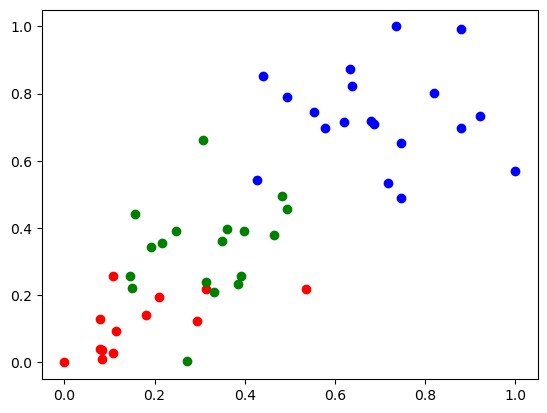

In [60]:
plt.scatter(norm_df[km==0,0],norm_df[km==0,1],color='blue')
plt.scatter(norm_df[km==1,0],norm_df[km==1,1],color='red')
plt.scatter(norm_df[km==2,0],norm_df[km==2,1],color='green')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

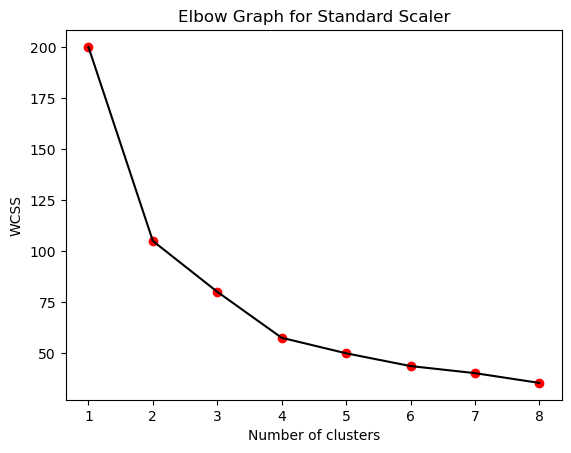

In [61]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Hierarchical 


In [62]:
model=AgglomerativeClustering(n_clusters=3,affinity="l2",linkage="complete")
pred=model.fit_predict(norm_df)
pred

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [64]:
xdist=pdist(norm_df,metric="euclidean")

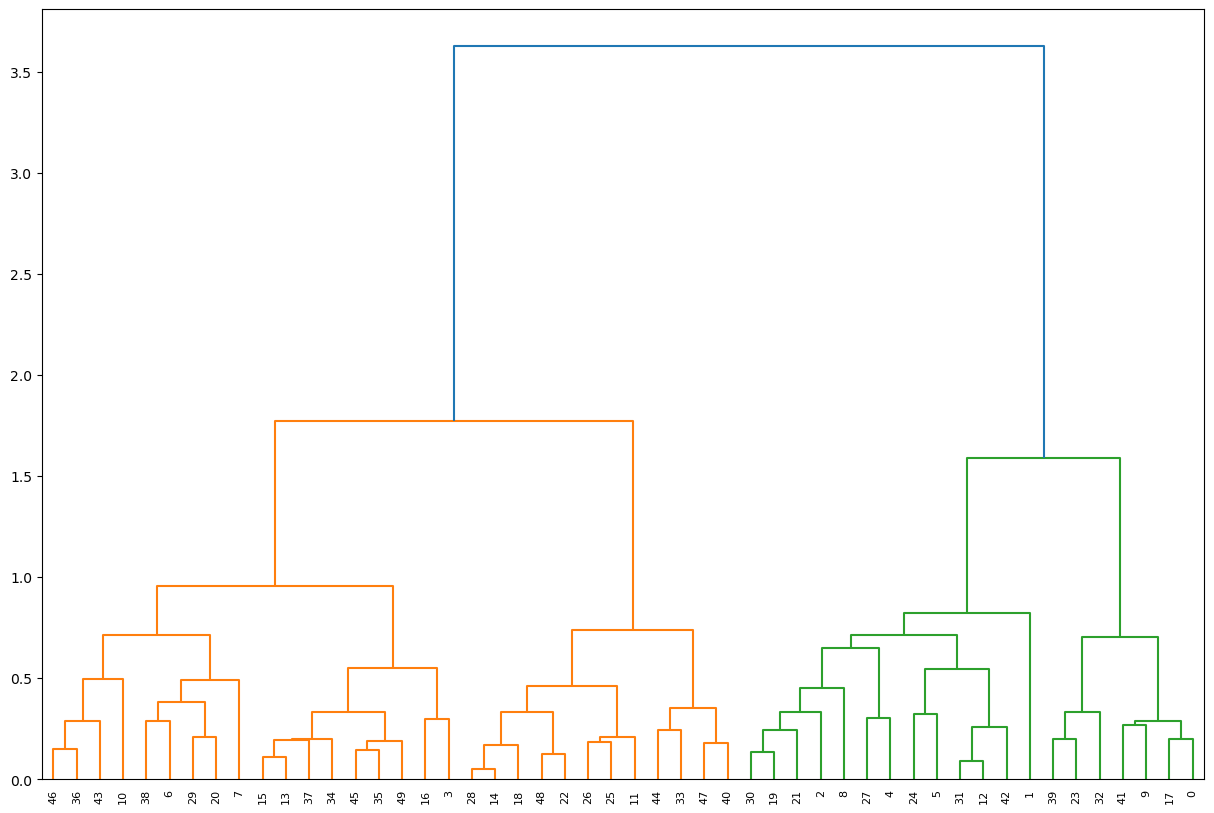

In [65]:
linked = linkage(xdist, 'ward')

plt.figure(figsize=(15,10))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

# DBSCAN

In [66]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [71]:
x,y=make_moons(50)

In [72]:
y

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0], dtype=int64)

In [73]:
x.shape

(50, 2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5204\4034844672.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


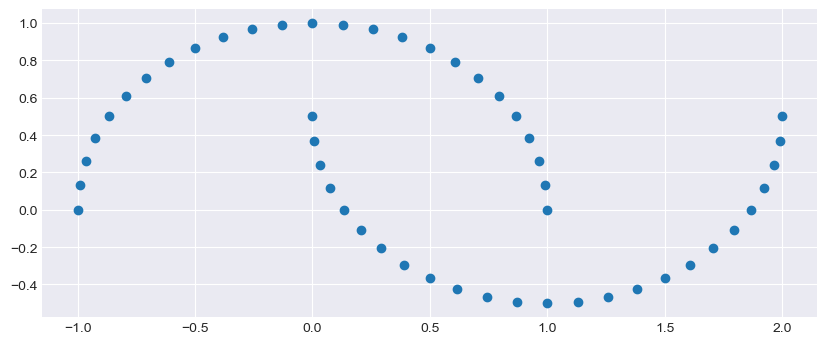

In [74]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(x[:,0],x[:,1])

In [75]:
model=DBSCAN(min_samples=2,eps=0.1)

model.fit_predict(x)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5204\4122075190.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


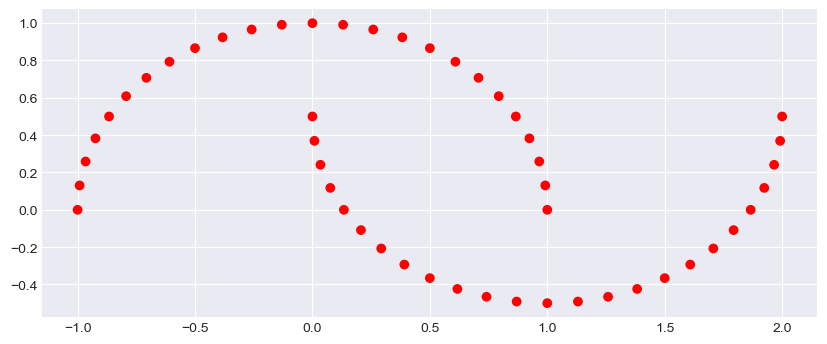

In [76]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(x[:,0],x[:,1],c=model.fit_predict(x),cmap=plt.cm.rainbow_r)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_5204\2465744206.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\

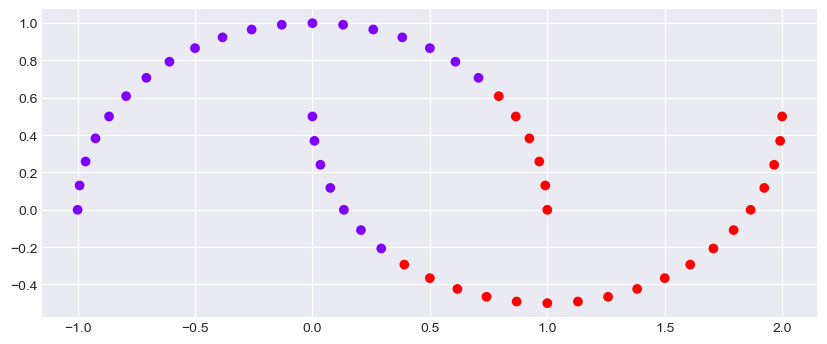

In [77]:
model=KMeans(n_clusters=2)

model.fit_predict(x)
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(x[:,0],x[:,1],c=model.fit_predict(x),cmap=plt.cm.rainbow_r)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_5204\3510068561.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


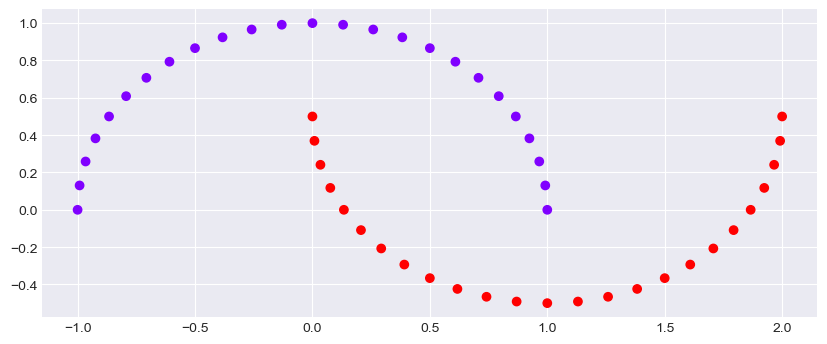

In [78]:
model=AgglomerativeClustering(n_clusters=2,affinity="l2",linkage="single")

model.fit_predict(x)
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(x[:,0],x[:,1],c=model.fit_predict(x),cmap=plt.cm.rainbow_r)

# Evaluation

# Elbow method

In [79]:
nc=range(1,11)
l=[]
for i in nc:
    
    model=KMeans(n_clusters=i)
    model.fit(norm_df)
    l.append(model.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\Admin\AppData\Local\Temp\ipykernel_5204\4072156312.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


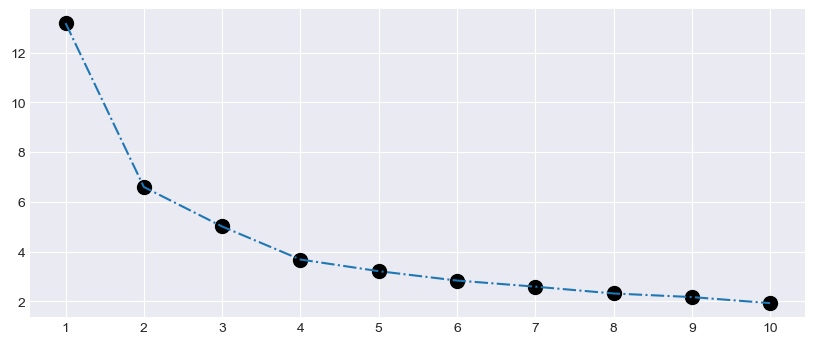

In [80]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()

In [81]:
l

[13.184122550256447,
 6.596893867946196,
 5.010878493006417,
 3.6834561535859134,
 3.2157225645265957,
 2.8384866349053732,
 2.5924855009704113,
 2.3187515876342055,
 2.174299050962932,
 1.9302929393235226]

# Silhouette

In [82]:
from sklearn.metrics import silhouette_score

In [83]:
nc=range(2,11)
l=[]
for i in nc:
    
    model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage="complete")
    l.append(silhouette_score(norm_df,model.fit_predict(norm_df)))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in ver

In [84]:
nc=range(2,11)
l=[]
for i in nc:
    
    model=KMeans(n_clusters=i)
    l.append(silhouette_score(norm_df,model.fit_predict(norm_df)))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\Admin\AppData\Local\Temp\ipykernel_5204\4072156312.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


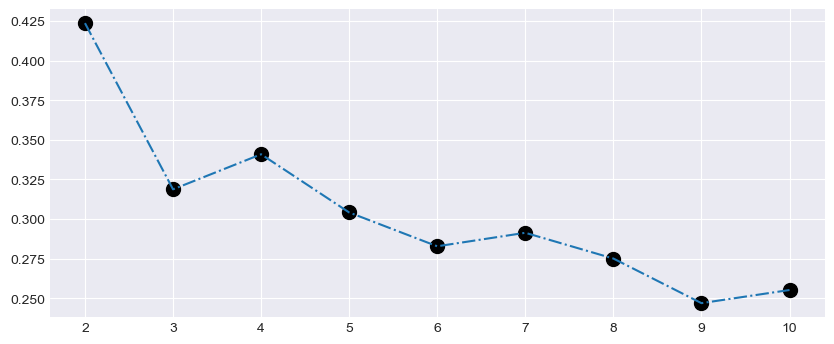

In [85]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()